In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import seaborn as sns

Format: JPEG
Size: (416, 416)
Mode: RGB


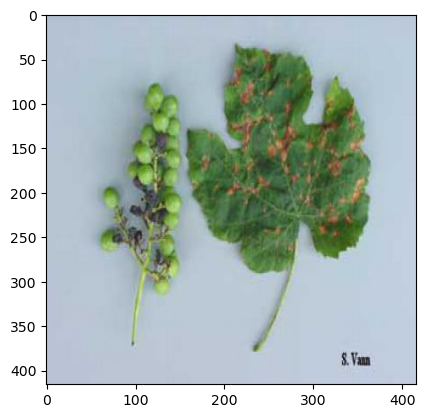

In [9]:
image_path = r"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\archive\"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\PlantDisease416x416\PlantDisease416x416\test"
sample_image = Image.open(os.path.join(image_path, r"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\PlantDisease416x416\PlantDisease416x416\test\testImage416_1.jpg"))
image_array = np.array(sample_image)
print(f"Format: {sample_image.format}")
print(f"Size: {sample_image.size}")  # (width, height)
print(f"Mode: {sample_image.mode}")  # 'RGB', 'L' (grayscale), etc.
plt.imshow(sample_image)
plt.show()

In [11]:
print(image_array)

[[[177 190 207]
  [177 190 207]
  [177 190 207]
  ...
  [185 198 215]
  [185 198 215]
  [185 198 215]]

 [[177 190 207]
  [177 190 207]
  [177 190 207]
  ...
  [185 198 215]
  [185 198 215]
  [185 198 215]]

 [[177 190 207]
  [177 190 207]
  [177 190 207]
  ...
  [185 198 215]
  [185 198 215]
  [185 198 215]]

 ...

 [[186 194 213]
  [186 194 213]
  [186 194 213]
  ...
  [197 204 223]
  [197 204 223]
  [197 204 223]]

 [[186 194 213]
  [186 194 213]
  [186 194 213]
  ...
  [197 204 223]
  [197 204 223]
  [197 204 223]]

 [[186 194 213]
  [186 194 213]
  [186 194 213]
  ...
  [197 204 223]
  [197 204 223]
  [197 204 223]]]


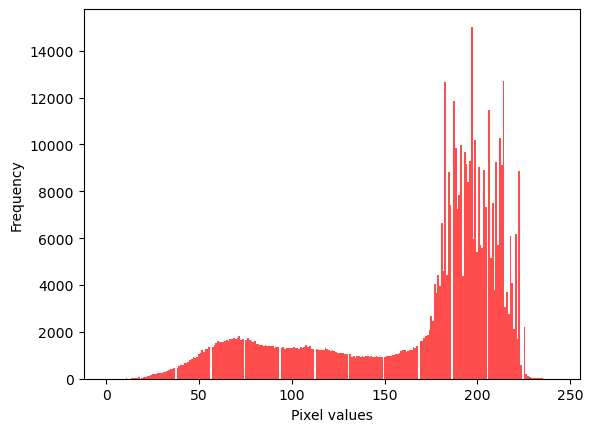

In [13]:
plt.hist(image_array.ravel(), bins=256, color='red', alpha=0.7)
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.show()

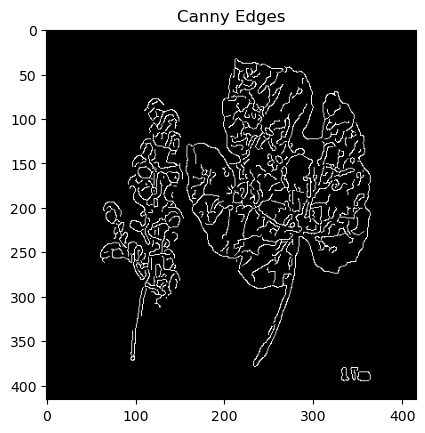

In [27]:
from skimage import feature, io, color
import matplotlib.pyplot as plt

# Correct the file path
im_path = r'C:\Users\JAI BHORTAKE\Desktop\DL project\archive\PlantDisease416x416\PlantDisease416x416\test\testImage416_1.jpg'

# Read the image
image = io.imread(im_path)

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Apply Canny edge detection
edges = feature.canny(gray_image, sigma=1.3)

# Plot the edges
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.show()


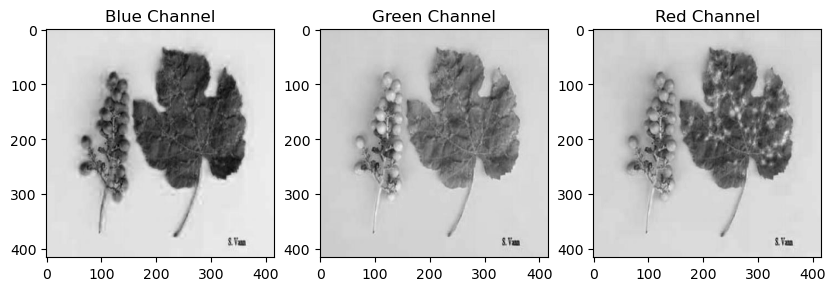

In [29]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(im_path)  # OpenCV loads images in BGR format
b, g, r = cv2.split(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Blue Channel')
plt.imshow(b, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Green Channel')
plt.imshow(g, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Red Channel')
plt.imshow(r, cmap='gray')
plt.show()


In [39]:
import os
import shutil
import random

# Define paths
data_dir = r"C:\Users\JAI BHORTAKE\Desktop\DL project\archive\PlantDisease416x416"
original_train_dir = os.path.join(data_dir, "train")
new_train_dir = os.path.join(data_dir, "new_train")
validate_dir = os.path.join(data_dir, "validate")

# Create new directories if they do not exist
os.makedirs(new_train_dir, exist_ok=True)
os.makedirs(validate_dir, exist_ok=True)

# Split the data
for disease in diseases:
    disease_dir = os.path.join(original_train_dir, disease)
    images = os.listdir(disease_dir)
    random.shuffle(images)

    split_idx = int(len(images) * 0.7)
    train_images = images[:split_idx]
    validate_images = images[split_idx:]

    # Create subdirectories in the new train and validate directories
    new_train_disease_dir = os.path.join(new_train_dir, disease)
    validate_disease_dir = os.path.join(validate_dir, disease)
    os.makedirs(new_train_disease_dir, exist_ok=True)
    os.makedirs(validate_disease_dir, exist_ok=True)

    # Move the files
    for image in train_images:
        src = os.path.join(disease_dir, image)
        dst = os.path.join(new_train_disease_dir, image)
        shutil.move(src, dst)

    for image in validate_images:
        src = os.path.join(disease_dir, image)
        dst = os.path.join(validate_disease_dir, image)
        shutil.move(src, dst)

print("Data split into train and validate folders.")


NameError: name 'diseases' is not defined